# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

from api_keys import weather_api_key

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # pprint(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind =  city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | okhotsk
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | ilawa
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | kapa'a
Processing Record 7 of Set 1 | vilyuchinsk
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | lorengau
Processing Record 13 of Set 1 | kristiansund
Processing Record 14 of Set 1 | mejit
Processing Record 15 of Set 1 | keflavik
Processing Record 16 of Set 1 | torghay
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | la rinconada
Processing Record 19 of Set 1 | usinsk
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | muzayri'
City not found. Skipping...
Processing Record 22 of Set 1 | orkney
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carnarvon,-24.8667,113.6333,300.11,54,46,7.47,AU,1736470663
1,okhotsk,59.3833,143.3000,252.91,78,7,6.16,RU,1736470664
2,grytviken,-54.2811,-36.5092,278.08,97,100,1.40,GS,1736470665
3,ilawa,53.5960,19.5685,278.66,95,100,6.75,PL,1736470667
4,isafjordur,66.0755,-23.1240,271.23,88,47,4.72,IS,1736470668


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carnarvon,-24.8667,113.6333,300.11,54,46,7.47,AU,1736470663
1,okhotsk,59.3833,143.3000,252.91,78,7,6.16,RU,1736470664
2,grytviken,-54.2811,-36.5092,278.08,97,100,1.40,GS,1736470665
3,ilawa,53.5960,19.5685,278.66,95,100,6.75,PL,1736470667
4,isafjordur,66.0755,-23.1240,271.23,88,47,4.72,IS,1736470668


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

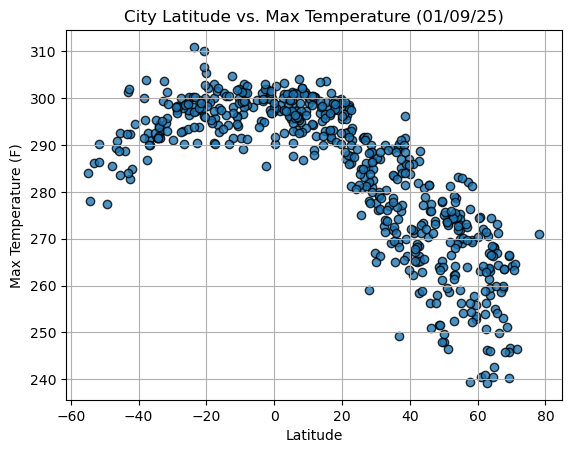

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Highest temperature is found at 0 Lattitude and as the latitude increases or dereases, temperature drops.

#### Latitude Vs. Humidity

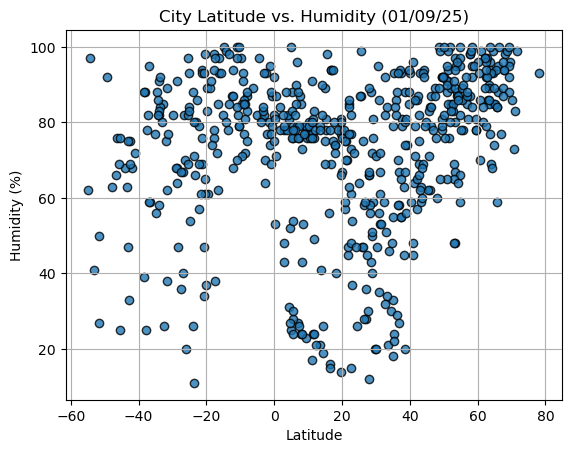

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

Polar regions have lower humidity and as latitude gets higher,humidity gets higher in southern hemisphere.

#### Latitude Vs. Cloudiness

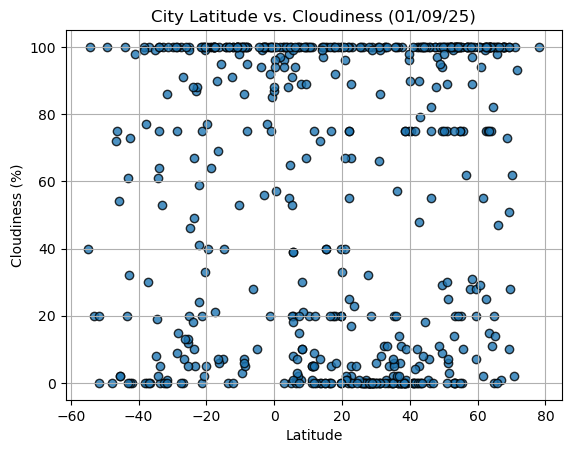

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

Cloudiness data is widely spread across the latitude.

#### Latitude vs. Wind Speed Plot

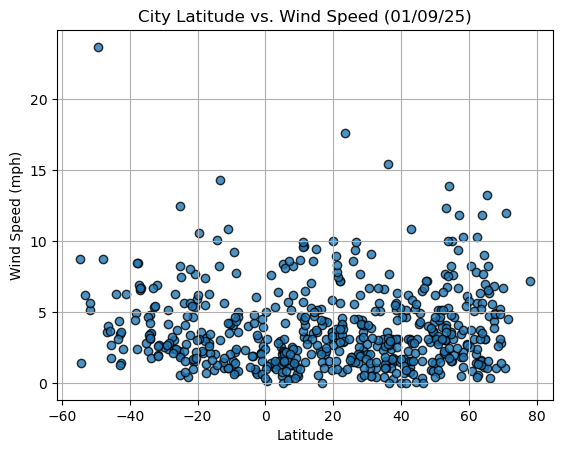

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

Wind speed data is widely spread across the latitude.

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,okhotsk,59.3833,143.3000,252.91,78,7,6.16,RU,1736470664
3,ilawa,53.5960,19.5685,278.66,95,100,6.75,PL,1736470667
4,isafjordur,66.0755,-23.1240,271.23,88,47,4.72,IS,1736470668
5,kapa'a,22.0752,-159.3190,298.41,85,75,7.20,US,1736470669
6,vilyuchinsk,52.9306,158.4028,262.30,69,0,3.01,RU,1736470670


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carnarvon,-24.8667,113.6333,300.11,54,46,7.47,AU,1736470663
2,grytviken,-54.2811,-36.5092,278.08,97,100,1.40,GS,1736470665
7,adamstown,-25.0660,-130.1015,296.32,84,100,12.46,PN,1736470671
10,punta arenas,-53.1500,-70.9167,286.21,41,20,6.17,CL,1736470434
11,lorengau,-2.0226,147.2712,301.99,77,77,3.19,PG,1736470676


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8488626229134708


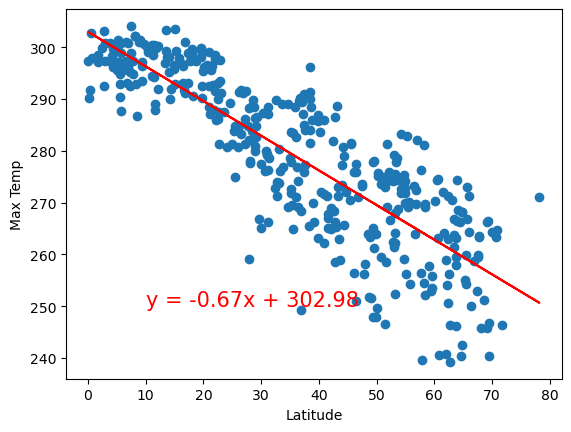

In [23]:
# # Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(10,250))




The r-squared is: 0.5404508122438988


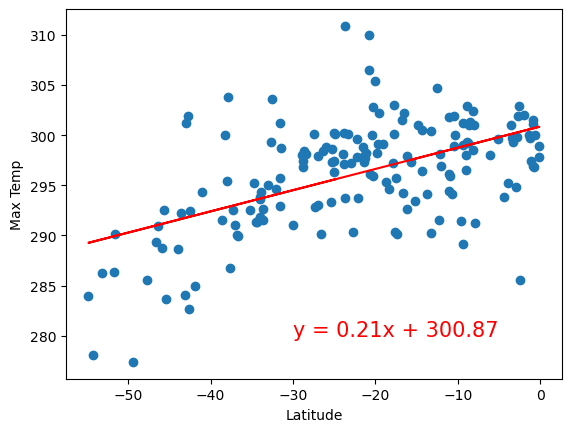

In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-30,280))

Discussion about the linear relationship: Northern Hemisphere r^2: has a moderate relationship between temperature and latitude. This means that about -86.15 covers the model, and some of the variability can be explained. While Southern Hemisphere r^2: has a strong relationship between temperature and latitude. This means that about 55.02%, which indicates a moderate to strong relationship. And that the independent variable can explain the variability of the dependent variable.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.41506753542501706


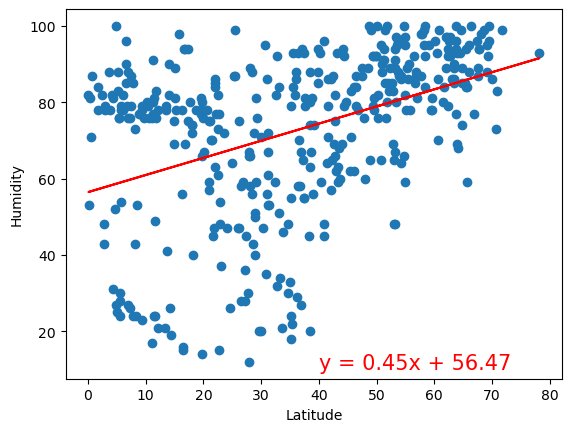

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-squared is: 0.36852404208423184


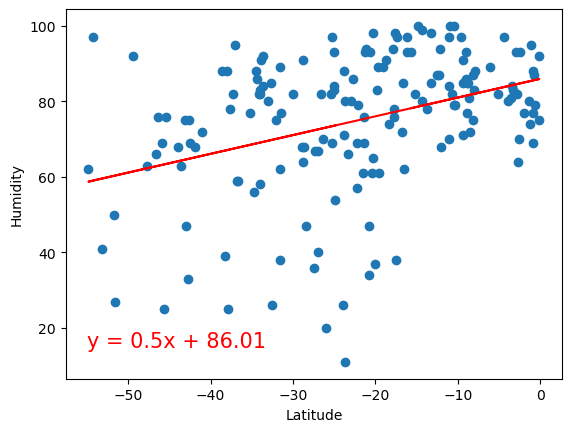

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(-55,15))


Discussion about the linear relationship: Northern Hemisphere r^2: has a strong relationship between temperature and latitude. This means that 43.26% does cover the model. Southern Hemisphere r^2: has a weak relationship. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.19369662178348215


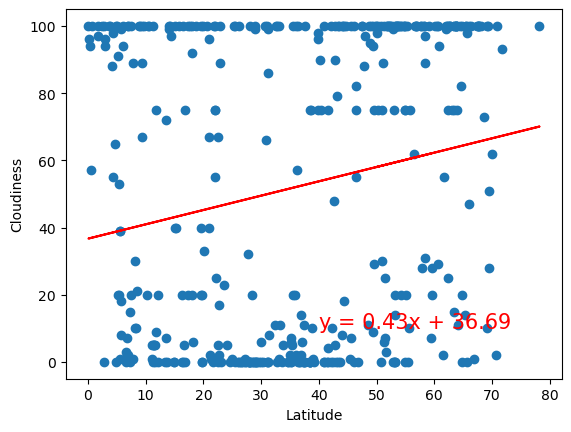

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(40,10))

The r-squared is: 0.3527432827835333


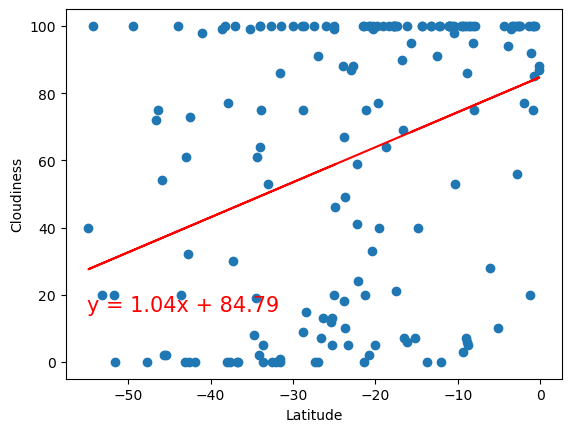

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(-55,15))

: Northern Hemisphere r^2: has a weak relationship between temperature and latitude. Southern Hemisphere r^2: has a moderate relationship. This means that some of the model is covered.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.12904335443662157


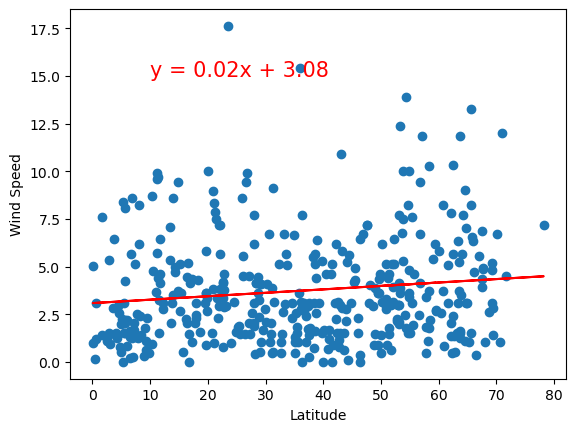

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(10,15))



The r-squared is: -0.2481398469758299


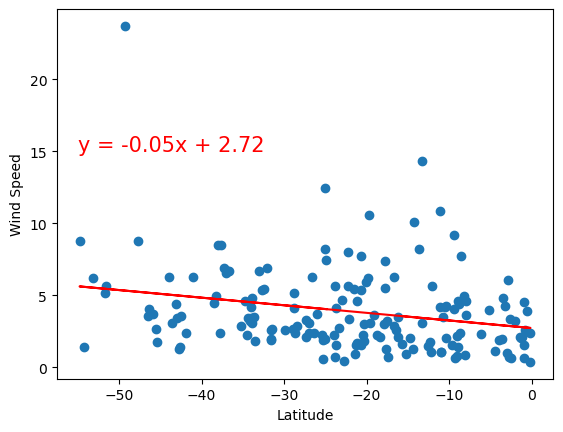

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(-55,15))


Northern Hemisphere r^2 and Southern Hemisphere r^2: have some coverage of the model.